In [ ]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

2024-11-11 08:32:05.308387: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#Load Data
images = np.load('data/images.npy')
labels = np.load('data/labels.npy')

#Shuffle
indices = np.arange(images.shape[0])
np.random.shuffle(indices)
images = images[indices]
labels = labels[indices]

# input image dimensions
img_rows, img_cols = images.shape[1], images.shape[2]

if K.image_data_format() == 'channels_first':
    images = images.reshape(images.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    images = images.reshape(images.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

images = images.astype('float32')
images /= 255

#80/10/10% splits for training/validation and test sets
train_images, temp_images, train_labels, temp_labels = train_test_split(images, labels, test_size=0.2)
val_images, test_images, val_labels, test_labels = train_test_split(temp_images, temp_labels, test_size=0.5)

In [3]:
#“common sense” accuracy
def common_sense_accuracy(predicted, actual):

    pred_minutes = predicted[0]*60+predicted[1]
    actual_minutes = actual[0]*60+actual[1]

    abs_diff = abs(pred_minutes-actual_minutes)
    
    return min(abs_diff, 12*60-abs_diff)

In [ ]:
def re_category(labels):
    # Hours transformation to sine and cosine (radians: 0 to 2π)
    hour_angle = (labels[:][0]) * (2 * np.pi / 12)
    hour_sin = np.sin(hour_angle)
    hour_cos = np.cos(hour_angle)

    # Minutes transformation to sine and cosine (radians: 0 to 2π)
    minute_angle = labels[:][1] * (2 * np.pi / 60)
    minute_sin = np.sin(minute_angle)
    minute_cos = np.cos(minute_angle)

    transformed_labels = np.vstack((hour_sin, hour_cos, minute_sin, minute_cos)).T
    return transformed_labels

train_labels2 = np.array([re_category(h) for h in train_labels])
val_labels2= np.array([re_category(h) for h in val_labels])
test_labels2 = np.array([re_category(h) for h in test_labels])

In [ ]:
batch_size = 32
epochs = 30
# Build Model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4, activation='tanh'))


model.compile(loss='mean_squared_error',  
              optimizer=keras.optimizers.Adadelta(),
              metrics=['mae'])

# Fit Model
history = model.fit(train_images, train_labels2,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(val_images, val_labels2))
df = pd.DataFrame(history.history)
df.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
# Evaluate Model
score = model.evaluate(val_images, val_labels2, verbose=0)
print('Validation loss:', score[0])
print('Validation MAE:', score[1])
score_final = model.evaluate(test_images, test_labels2, verbose=0)
print('Test loss:', score_final[0])
print('Test MAE:', score_final[1])

/home/yiru/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


2024-11-11 08:32:09.090057: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 324000000 exceeds 10% of free system memory.


450/450 ━━━━━━━━━━━━━━━━━━━━ 137s 300ms/step - loss: 0.5010 - mae: 0.6318 - val_loss: 0.5000 - val_mae: 0.6295
Epoch 2/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 123s 274ms/step - loss: 0.5005 - mae: 0.6304 - val_loss: 0.5000 - val_mae: 0.6295
Epoch 3/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 121s 270ms/step - loss: 0.5004 - mae: 0.6310 - val_loss: 0.5000 - val_mae: 0.6296
Epoch 4/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 117s 260ms/step - loss: 0.5003 - mae: 0.6301 - val_loss: 0.5001 - val_mae: 0.6296
Epoch 5/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 118s 263ms/step - loss: 0.5003 - mae: 0.6308 - val_loss: 0.5001 - val_mae: 0.6296
Epoch 6/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 116s 258ms/step - loss: 0.5003 - mae: 0.6293 - val_loss: 0.5001 - val_mae: 0.6295
Epoch 7/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 116s 258ms/step - loss: 0.5002 - mae: 0.6308 - val_loss: 0.5000 - val_mae: 0.6295
Epoch 8/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 117s 260ms/step - loss: 0.5003 - mae: 0.6308 - val_loss: 0.5000 - val_mae: 0.6295
Epoch 9/30
450/450 ━━━━━━━━━━━━━━━━

In [12]:
print('Validation loss:', score[0])
print('Validation compile_metrics:', score[0])

Validation loss: 0.5000431537628174
Validation compile_metrics: 0.5000431537628174


In [6]:
def calculate_time_from_predictions(predictions):
    hour_sin, hour_cos, minute_sin, minute_cos = predictions[:, 0], predictions[:, 1], predictions[:, 2], predictions[:, 3]

    # Calculate angles for hours and minutes
    hour_angle = np.arctan2(hour_sin, hour_cos)
    minute_angle = np.arctan2(minute_sin, minute_cos)

    # Convert angles back to hour and minute values
    hour = ((hour_angle % (2 * np.pi)) * (12 / (2 * np.pi))).astype(int)
    minute = ((minute_angle % (2 * np.pi)) * (60 / (2 * np.pi))).astype(int)

    return hour, minute

In [ ]:
predictions = model.predict(test_images)
predicted_hours, predicted_minutes = calculate_time_from_predictions(predictions)

common_sense_errors = [common_sense_accuracy([predicted_hours[i], predicted_minutes[i]], test_labels[i]) 
                       for i in range(len(test_labels))]
print('Average common sense error:', np.mean(common_sense_errors))

57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step
Average common sense error: 181.085


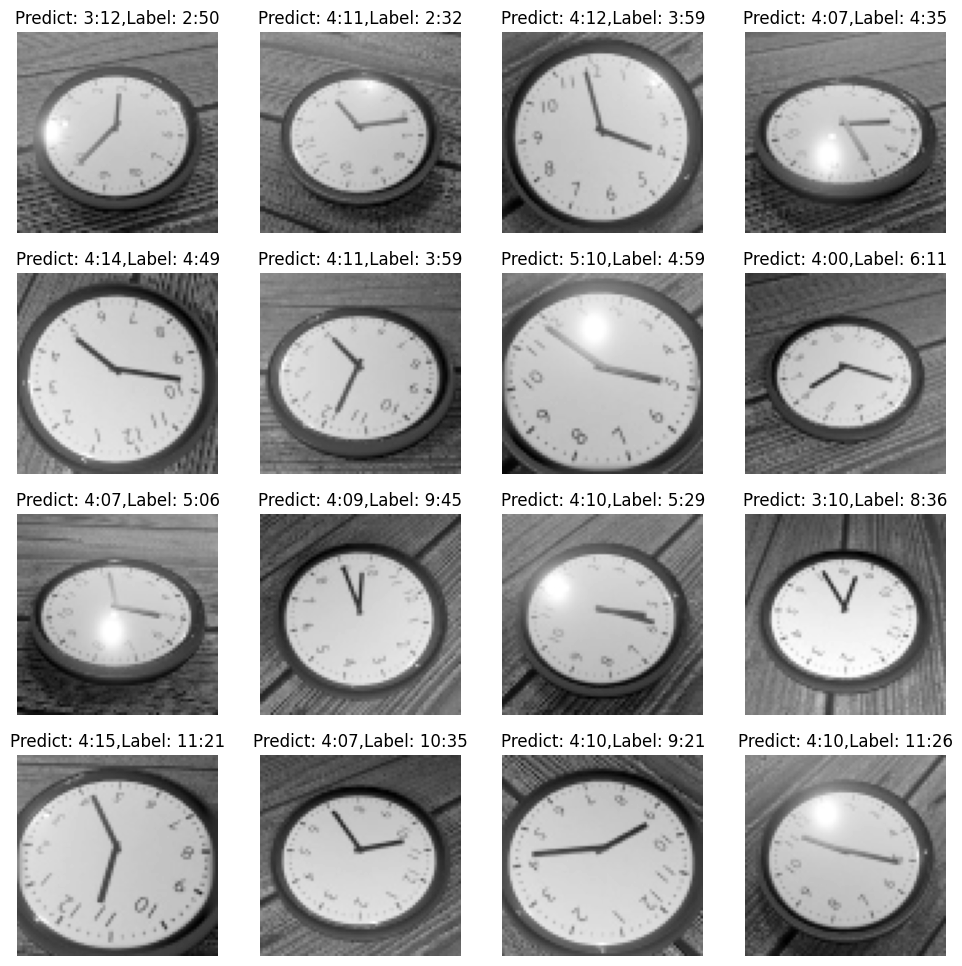

In [8]:
# Plot a sample of clock images
plt.figure(figsize=(12, 12))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f'Predict: {predicted_hours[i]}:{predicted_minutes[i]:02d},Label: {test_labels[i][0]}:{test_labels[i][1]:02d}')
    plt.axis('off')
plt.show()